In [2]:
import pandas as pd
import numpy as np

import time
from os import getcwd 
from os.path import exists

getcwd() # current working directory

'D:\\project\\MIT_glyco'

In [3]:
version = 'v0'
update = False

# dataset for machine learning

In [4]:
### This part is grouping the positive sites of protein with same name ###
time_start = time.time()

# load O-GlcNAcylated site data
load_name = f'data_for_ml_v2.csv'
ml_data = pd.read_csv(load_name, header=0, index_col=0) 

In [5]:
ml_data_positive = ml_data[ml_data["positive"]==1]
ml_data_negative = ml_data[ml_data["positive"]==0]

In [5]:
# the number of positive sites = 538
ml_data_positive

,name,index,SEQ,positive,window,nSer,nThr,nAli,nPos,P_after,...,ASA,Phi,Psi,Theta(i-1=>i+1),Tau(i-2=>i+2),HSE_alpha_up,HSE_alpha_down,P(C),P(H),P(E)
65,A2ABU4,429,T,1,"WMPCLKAPGG""T""CRCPIQGLVE",0,0,1,1,False,...,63.4,-107.9,135.3,120.2,-35.5,10.1,22.2,0.707,0.013,0.280
254,A2AGT5,567,S,1,"GKTTAPGGSA""S""AGTKNKKGLE",1,3,1,0,False,...,72.1,-85.8,117.2,109.6,-131.2,6.4,12.0,0.795,0.173,0.032
474,A2AHJ4,263,S,1,"CAPVAVLQGH""S""ASITSIQFCP",2,1,0,0,False,...,61.4,-88.6,-3.1,101.1,-144.8,9.1,24.1,0.972,0.003,0.025
480,A2AHJ4,278,T,1,"SIQFCPSTKG""T""TRYLTSTGAD",3,4,0,0,False,...,62.1,-100.6,124.5,115.3,88.0,10.7,17.6,0.895,0.020,0.086
728,A2AKB9,86,T,1,"APGALELSAA""T""ASASQAKLSP",4,0,2,0,False,...,27.0,-69.8,-35.4,94.6,51.5,18.9,22.2,0.208,0.428,0.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41269,Q9UPN6,614,T,1,"SEPVKETVQT""T""QSPTPVEKET",2,4,1,1,False,...,105.5,-84.3,2.7,102.9,82.0,2.6,9.9,0.941,0.037,0.022
41990,Q9UQ35,2235,S,1,"ANLASRIPAA""S""AAAMNLASAR",2,0,3,1,False,...,65.6,-68.0,-35.7,95.7,56.7,4.9,14.7,0.526,0.470,0.004
42339,Q9Y2X9,890,S,1,"PCSTRVKTPT""S""QSYR",2,3,1,1,False,...,62.7,-83.8,-1.6,103.3,140.9,9.9,14.2,0.628,0.114,0.258
42679,Q9Y520,2242,T,1,"SSSLTSVPPT""T""FSLTFKMESA",6,3,2,0,False,...,60.7,-104.6,131.4,117.4,-146.8,10.7,22.8,0.827,0.127,0.047


In [6]:
print("positive sites")
display(ml_data_positive["window"].apply(lambda x: x[x.find('"')-1:x.find('"')+4]).value_counts()/len(ml_data_positive)*100) # analyze -1/+1 window
print()
print("negative sites")
display(ml_data_negative["window"].apply(lambda x: x[x.find('"')-1:x.find('"')+4]).value_counts()/len(ml_data_negative)*100)

positive sites


S"S"A    2.602230
V"S"S    2.416357
S"S"S    2.044610
T"T"S    2.044610
T"S"S    1.858736
           ...   
H"S"T    0.185874
S"T"E    0.185874
L"T"V    0.185874
Q"T"I    0.185874
T"T"Q    0.185874
Name: window, Length: 266, dtype: float64


negative sites


S"S"S    1.757249
S"S"P    0.827775
P"S"P    0.721347
P"S"S    0.709522
S"S"T    0.690601
           ...   
M"S"W    0.002365
Y"T"     0.002365
E"S"     0.002365
T"S"     0.002365
G"T"     0.002365
Name: window, Length: 821, dtype: float64

In [7]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42820 entries, 0 to 42819
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             42820 non-null  object 
 1   index            42820 non-null  int64  
 2   SEQ              42820 non-null  object 
 3   positive         42820 non-null  int64  
 4   window           42820 non-null  object 
 5   nSer             42820 non-null  int64  
 6   nThr             42820 non-null  int64  
 7   nAli             42820 non-null  int64  
 8   nPos             42820 non-null  int64  
 9   P_after          42820 non-null  object 
 10  flexibility      42820 non-null  float64
 11  SS               42820 non-null  object 
 12  SS_angle         42820 non-null  object 
 13  side-1           42820 non-null  object 
 14  side1            42820 non-null  object 
 15  side2            42820 non-null  object 
 16  side3            42820 non-null  object 
 17  side4       

In [6]:
ml_data_mod = ml_data.astype({'nSer': 'object', 'nThr': 'object', 'nAli': 'object', 'nPos': 'object'})

cat_columns = ["nSer", "nThr", "nAli", "nPos", "P_after", "SEQ", "SS", "SS_angle", "side-1", "side1", "side2", "side3", "side4", "side5"]
ml_data_cat = pd.get_dummies(ml_data_mod[cat_columns])
print("categorical data:", ml_data_cat.shape)
display(ml_data_cat.head(1))

print()

cts_columns = ["flexibility"]
ml_data_cts = pd.get_dummies(ml_data[cts_columns])
print("continuous data:", ml_data_cts.shape)
display(ml_data_cts.head(1))

print()

y_columns = ["positive"]
ml_data_y = ml_data[y_columns]
print("label data:", ml_data_y.shape)
display(ml_data_y.head(1))

categorical data: (42820, 106)


C:\Users\honsu\AppData\Local\Temp\ipykernel_23844\3226566750.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  ml_data_cat = pd.get_dummies(ml_data_mod[cat_columns])


,nSer_0,nSer_1,nSer_2,nSer_3,nSer_4,nSer_5,nSer_6,nSer_7,nSer_8,nSer_9,...,side4_small,side4_very small,side5_0,side5_cycle,side5_gly,side5_long,side5_normal,side5_pro,side5_small,side5_very small
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0



continuous data: (42820, 1)


,flexibility
0,0.384



label data: (42820, 1)


,positive
0,0


In [7]:
ml_data_cat.columns

Index(['nSer_0', 'nSer_1', 'nSer_2', 'nSer_3', 'nSer_4', 'nSer_5', 'nSer_6',
       'nSer_7', 'nSer_8', 'nSer_9',
       ...
       'side4_small', 'side4_very small', 'side5_0', 'side5_cycle',
       'side5_gly', 'side5_long', 'side5_normal', 'side5_pro', 'side5_small',
       'side5_very small'],
      dtype='object', length=106)

# ML model development

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
def basicMLP(x_dim, y_dim, n_layers, n_neurons):
    mlp_input = Input(shape=(x_dim,), name='dense_input')
    
    # MLP module
    for i in range(n_layers):
        if i==0:
            dense_output = Dense(n_neurons, name=f"dense_{i+1}")(mlp_input)
        else: 
            dense_output = Dense(n_neurons, name=f"dense_{i+1}")(dense_output)
    mlp_output = Dense(y_dim, name=f"dense_output", activation='sigmoid')(dense_output)
    
    model = Model(mlp_input, mlp_output)
    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='binary_crossentropy',optimizer = optimizer, metrics=['accuracy'])
    
    return model

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_confusion(y_real, y_pred, title, label=["True", "False"], size=4):
    if y_real.max() == 1:
        cm = confusion_matrix(y_real, y_pred)
        cm = cm.flatten()[::-1].reshape(2,2)
        plt.figure(figsize=(size*1.2,size))
        heatmap(cm, annot=True, fmt='.0f',
                cmap='Blues', 
                xticklabels=label, yticklabels=label)
        plt.title(title)
        plt.xlabel("Predicted")
        plt.ylabel("Real")
        plt.show()
        
        accuracy  = 100*np.array(accuracy_score(y_real, y_pred)).round(4)
        precision = 100*np.array(precision_score(y_real, y_pred, average=None)).round(4)
        recall    = 100*np.array(recall_score(y_real, y_pred, average=None)).round(4)
        f1        = 100*np.array(f1_score(y_real, y_pred, average=None)).round(4)
        print(f"accuracy  : {accuracy}")
        print(f"precision : {precision}")
        print(f"recall    : {recall}")
        print(f"f1_score  : {f1}")

In [11]:
data_x = pd.concat([ml_data_cts, ml_data_cat], axis=1)
data_y = ml_data_y

valid_size = 0.2
test_size = 0.2
random_state=1

print("target dataset")
print(data_x.shape)
print(data_y.shape)
print("")

target_x = data_x
target_y = data_y
split = StratifiedShuffleSplit(n_splits = 1, test_size = test_size, random_state = random_state)
for train_index, test_index in split.split(target_x, target_y):
    train_x = target_x.loc[train_index]
    train_y = target_y.loc[train_index]
    
    test_x = target_x.loc[test_index]
    test_y = target_y.loc[test_index]
    
print("train/test dataset")
print("train:", train_x.shape, train_y.shape)
print("test:", test_x.shape, test_y.shape)

min_x = train_x.min(0)
max_x = train_x.max(0)
train_x_sc = (train_x - min_x) / (max_x - min_x)
test_x_sc = (test_x - min_x) / (max_x - min_x)

target dataset
(42820, 107)
(42820, 1)

train/test dataset
train: (34256, 107) (34256, 1)
test: (8564, 107) (8564, 1)


## basic MLP
train 80%(valid 20%) 34256 / test 20% 8564, 
positives 430 / 108, 
negatives 33826 / 8456

In [12]:
model_type = 'basicMLP'
x_dim = train_x.shape[1]
y_dim = train_y.shape[1]
n_layers = 5
n_neurons = 100
patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')

mlp_model = basicMLP(x_dim, y_dim, n_layers, n_neurons)
model_name = f"{model_type} {x_dim} {y_dim} {n_layers} {n_neurons} {random_state} {version}"
save_path = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = mlp_model.fit(train_x, train_y, verbose=2,
                            epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size
                        )
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    mlp_model.save_weights(save_path)
    print(f"model is saved to: {save_path}")
    
    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")
    
else:
    mlp_model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")
    
    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
mlp_model.summary()

model is loaded from: ./model/basicMLP 107 1 5 100 1 v0.h5
history is loaded from: ./result/basicMLP 107 1 5 100 1 v0.csv
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 107)]             0         
                                                                 
 dense_1 (Dense)             (None, 100)               10800     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
     

268/268 [==============================] - 0s 673us/step


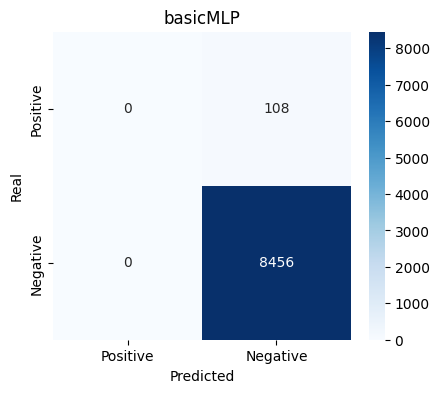

accuracy  : 98.74000000000001
precision : [98.74  0.  ]
recall    : [100.   0.]
f1_score  : [99.37  0.  ]


C:\Users\honsu\anaconda3\envs\glyco\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# plot result
prediction = mlp_model.predict(test_x)
prediction_int = prediction.round(0).astype(int)

y_real = test_y.values
y_pred = prediction_int
    
plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## MLP with up sampling

In [14]:
import random
random.seed(random_state)

# upsampling for train dataset
train_xy = pd.concat([train_x, train_y], axis=1)
train_xy_pos = train_xy[train_xy['positive']==1]
train_xy_neg = train_xy[train_xy['positive']==0]
test_xy = pd.concat([test_x, test_y], axis=1)
test_xy_pos = test_xy[test_xy['positive']==1]
test_xy_neg = test_xy[test_xy['positive']==0]

up_index = [random.choice(range(len(train_xy_pos))) for _ in range(len(train_xy_neg))] # get samples from positive sites
up_sample = train_xy_pos.iloc[up_index]
train_xy_up = pd.concat([up_sample, train_xy_neg], axis=0) # concatenate upsampled positives with negatives
train_xy_up = train_xy_up.sample(frac=1, random_state=random_state) # shuffle the dataframe

down_index = [random.choice(range(len(test_xy_neg))) for _ in range(len(test_xy_pos))] # get samples from positive sites
down_sample = test_xy_neg.iloc[down_index]
test_xy_down = pd.concat([down_sample, test_xy_pos], axis=0) # concatenate upsampled positives with negatives
test_xy_down = test_xy_down.sample(frac=1, random_state=random_state) # shuffle the dataframe

In [15]:
train_x_up = train_xy_up.iloc[:,:-1]
train_y_up = train_xy_up.iloc[:,[-1]]

test_x_down = test_xy_down.iloc[:,:-1]
test_y_down = test_xy_down.iloc[:,[-1]]

print("up-sampled train dataset:", train_x_up.shape, train_y_up.shape)
print("down-sampled test dataset:", test_x_down.shape, test_y_down.shape)

up-sampled train dataset: (67652, 107) (67652, 1)
down-sampled test dataset: (216, 107) (216, 1)


In [16]:
model_type = 'basicMLP_sample'
x_dim = train_x.shape[1]
y_dim = train_y.shape[1]
n_layers = 5
n_neurons = 100
patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')

mlp_sample_model = basicMLP(x_dim, y_dim, n_layers, n_neurons)
model_name = f"{model_type} {x_dim} {y_dim} {n_layers} {n_neurons} {random_state} {version}"
save_path = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = mlp_sample_model.fit(train_x_up, train_y_up, verbose=2,
                            epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size
                        )
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    mlp_sample_model.save_weights(save_path)
    print(f"model is saved to: {save_path}")
    
    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")
    
else:
    mlp_sample_model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")
    
    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
mlp_sample_model.summary()

model is loaded from: ./model/basicMLP_sample 107 1 5 100 1 v0.h5
history is loaded from: ./result/basicMLP_sample 107 1 5 100 1 v0.csv
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 107)]             0         
                                                                 
 dense_1 (Dense)             (None, 100)               10800     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               

268/268 [==============================] - 0s 838us/step


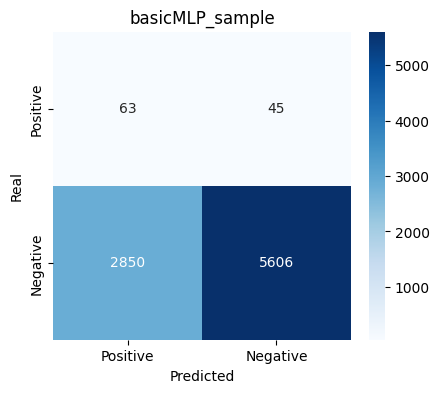

accuracy  : 66.2
precision : [99.2   2.16]
recall    : [66.3  58.33]
f1_score  : [79.48  4.17]


In [17]:
# plot result
prediction = mlp_sample_model.predict(test_x)
prediction_int = prediction.round(0).astype(int)

y_real = test_y.values
y_pred = prediction_int

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## ensemble MLP

In [18]:
model_type = 'ensembleMLP'
x_dim = train_x.shape[1]
y_dim = train_y.shape[1]
n_models = 100
n_layers = 3
n_neurons = 100
patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')

ensemble_models = []
for i in range(n_models):
    print(f"{i}th model")
    random.seed(i)

    # upsampling for train dataset
    train_xy = pd.concat([train_x, train_y], axis=1)
    train_xy_pos = train_xy[train_xy['positive']==1]
    train_xy_neg = train_xy[train_xy['positive']==0]
    ensemble_xy_neg = train_xy_neg.sample(n=len(train_xy_pos), random_state=i)
    ensemble_xy = pd.concat([train_xy_pos, ensemble_xy_neg], axis=0) # concatenate upsampled positives with negatives
    
    ensemble_x = ensemble_xy.iloc[:,:-1]
    ensemble_y = ensemble_xy.iloc[:,[-1]]

    ensemble_model = basicMLP(x_dim, y_dim, n_layers, n_neurons)
    model_name   = f"{model_type} {x_dim} {y_dim} {n_layers} {n_neurons} {i} {version}"
    save_path    = f"./model/{model_name}.h5"
    history_path = f"./result/{model_name}.csv"

    if not exists(save_path) or update:
        tf.random.set_seed(i)
        time_start = time.time()
        history = ensemble_model.fit(ensemble_x, ensemble_y, verbose=0,
                                     epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
        time_end = time.time()
        time_elapse = round((time_end - time_start)/60, 3)
        history_df = pd.DataFrame(history.history)
        history_df.index.name = f"{time_elapse} min"

        ensemble_model.save_weights(save_path)
        print(f"model is saved to: {save_path}")

        history_df.to_csv(history_path)
        print(f"history is saved to: {history_path}")
        
        ensemble_models.append(ensemble_model)
    
    else:
        ensemble_model.load_weights(save_path)
        print(f"model is loaded from: {save_path}")

        history_df = pd.read_csv(history_path, index_col=0, header=0)
        print(f"history is loaded from: {history_path}")
        
        ensemble_models.append(ensemble_model)

0th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 0 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 0 v0.csv
1th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 1 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 1 v0.csv
2th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 2 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 2 v0.csv
3th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 3 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 3 v0.csv
4th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 4 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 4 v0.csv
5th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 5 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 5 v0.csv
6th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 6 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 6 v0.csv
7th model
model is loaded from: ./

model is loaded from: ./model/ensembleMLP 107 1 3 100 62 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 62 v0.csv
63th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 63 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 63 v0.csv
64th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 64 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 64 v0.csv
65th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 65 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 65 v0.csv
66th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 66 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 66 v0.csv
67th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 67 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 67 v0.csv
68th model
model is loaded from: ./model/ensembleMLP 107 1 3 100 68 v0.h5
history is loaded from: ./result/ensembleMLP 107 1 3 100 68 v0.csv
69th model
model is load

In [19]:
predictions = []
for model in ensemble_models:
    prediction = model.predict(test_x, verbose=0)
    predictions.append(prediction)


In [ ]:
predictions_arr

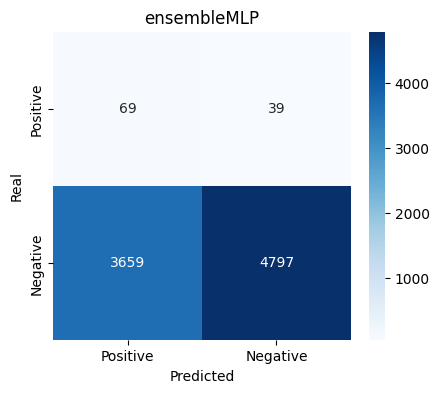

accuracy  : 56.82000000000001
precision : [99.19  1.85]
recall    : [56.73 63.89]
f1_score  : [72.18  3.6 ]


In [20]:
predictions_arr = np.array(predictions)
prediction_soft = predictions_arr.mean(0)
prediction_soft = prediction_soft.round(0).astype(int)

# plot result
y_real = test_y.values
y_pred = prediction_soft

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## basic RNN

In [21]:
save_name = "all_sites_group.csv"
all_sites = pd.read_csv(save_name)
series = all_sites['sequence'].apply(lambda x: pd.Series([f"{i}" for i in x]))
array = series.to_numpy()
ravel = array.reshape(-1)
series = pd.Series(ravel)

'''
Alanine (Ala, A)
Arginine (Arg, R)
Asparagine (Asn, N)
Aspartic acid (Asp, D)
Cysteine (Cys, C)
Glutamic acid (Glu, E)
Glutamine (Gln, Q)
Glycine (Gly, G)
Histidine (His, H)
Isoleucine (Ile, I)
Leucine (Leu, L)
Lysine (Lys, K)
Methionine (Met, M)
Phenylalanine (Phe, F)
Proline (Pro, P)
Serine (Ser, S)
Threonine (Thr, T)
Tryptophan (Trp, W)
Tyrosine (Tyr, Y)
Valine (Val, V)
'''

series.value_counts()

S    26408
L    22207
A    20490
P    19930
E    19446
G    17145
T    16694
K    16144
V    15849
Q    14453
R    14353
D    12784
I    10357
N     9593
F     7609
H     6194
Y     5785
M     5312
C     4323
W     2116
X        2
         1
dtype: int64

In [50]:
def make_string(x, window_size):
    index = x.find('"')
    return x[max(index-window_size,0):index]+x[index+1]+x[index+3:min(index+3+window_size, len(x))]

In [51]:
dictionary = {"A":1, "R":2, "N":3, "D":4, "C":5, 
              "E":6, "Q":7, "G":8, "H":9, "I":10, 
              "L":11, "K":12, "M":13, "F":14, "P":15, 
              "S":16, "T":17, "W":18, "Y":19, "V":20}
num_AA = len(dictionary.keys())

def letter_to_token(letter):
    if letter in dictionary.keys():
        return dictionary[letter]
    else:
        return 0    

In [55]:
def window_to_df(window, window_size=10):
    sequence_window = window.apply(make_string, window_size=window_size)
    n_sequence = len(sequence_window)
    window_len = 2*window_size+1
    sequence_df = pd.DataFrame(np.zeros((n_sequence, window_len)), columns=[i+1 for i in range(window_len)])
    
    for i in range(n_sequence):
        sequence = sequence_window[i]
        for j in range(len(sequence)):
            sequence_df.iloc[i,j] = sequence[j]
    for i in range(window_len):
        sequence_df[i+1] = sequence_df[i+1].apply(letter_to_token)
    
    return sequence_df
    
def AA_onehot_encoding(sequence_df):
    sequence_onehot = []
    for sequence in sequence_df.to_numpy():
        temp = []
        for AA_token in sequence:
            if AA_token > 0:
                temp.append(np.eye(num_AA)[AA_token-1])
            else:
                temp.append(np.zeros(num_AA))
        sequence_onehot.append(temp)
        
    return np.array(sequence_onehot)

In [56]:
sequence_df = window_to_df(ml_data['window'])
sequence_onehot = AA_onehot_encoding(sequence_df)

In [57]:
sequence_onehot.shape
# (samples, window length, token size) = (42819, 21, 21)
# samples = 42,819 = the size of ml_data 
# window length = 21= -10/+10 window from the serine or threonine 
# token size = 21 = 20 + 1 total types of amino acids in protein 20 + Nothing

(42820, 21, 20)

In [26]:
# split train/test dataset
random_state=1

target_x = rnn_arr
target_y = ml_data[['positive']].values
split = StratifiedShuffleSplit(n_splits = 1, test_size = test_size, random_state = random_state)
for train_index, test_index in split.split(target_x, target_y):
    train_rnn_x = target_x[train_index]
    train_rnn_y = target_y[train_index]
    
    test_rnn_x = target_x[test_index]
    test_rnn_y = target_y[test_index]
    
print(f"train X dataset: {train_rnn_x.shape}")
print(f"test X dataset: {test_rnn_x.shape}")

train X dataset: (34256, 21, 20)
test X dataset: (8564, 21, 20)


In [126]:
from tensorflow.keras.optimizers import Adam

def ClassifierLSTM(
    history_size, history_dim, class_num,
    rnn_layers = 1, rnn_neurons = 100,
    dense_layers = 1, dense_neurons = 100,
    optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999), loss="binary_crossentropy", metrics = ['accuracy']
):
    encoder_input = Input(shape=(None, history_dim), name='input_encoder')
    
    # encoder module
    if rnn_layers == 1:
        encoder_output, state_h, state_c = LSTM(rnn_neurons, return_state=True, name='encoder_last')(encoder_input)
        # encoder_states = [state_h, state_c]
        
    else:
        for i in range(rnn_layers):
            #first encoder layer
            if i==0: 
                encoder_output = LSTM(rnn_neurons, return_sequences=True, name="encoder_1")(encoder_input)
            #mediate encoder layer
            elif i < rnn_layers-1: 
                encoder_output = LSTM(rnn_neurons, return_sequences=True, name=f"encoder_{i+1}")(encoder_output)
            #last encoder layer
            else: 
                encoder_output, state_h, state_c  = LSTM(rnn_neurons, return_state=True, name=f"encoder_last")(encoder_output)
                # encoder_states = [state_h, state_c]
    
    # dense module
    if dense_layers == 1:
        dense_output = Dense(dense_neurons, name='dense_1')(encoder_output)
    else:
        for i in range(dense_layers):
            #first dense layer
            
            if i==0:
                dense_output = Dense(dense_neurons, name='dense_1')(encoder_output)
            #mediate encoder layer
            else:
                dense_output = Dense(dense_neurons, name=f'dense_{i+1}')(dense_output)
    dense_output = Dense(1, activation='sigmoid', name=f'dense_last')(dense_output)  
    
    # model compile
    model = Model(encoder_input, dense_output)
    model.compile(loss=loss,optimizer = optimizer, metrics=metrics)
    
    return model

In [127]:
model_type = 'basicRNN'

# history_size = test_rnn_x.shape[1]
history_dim = test_rnn_x.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 2
dense_neurons = 100


patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')


rnn_model = ClassifierLSTM(history_size, history_dim, y_dim,
                           rnn_layers = rnn_layers, 
                           rnn_neurons = rnn_neurons,
                           dense_layers = dense_layers, 
                           dense_neurons = dense_neurons
                          ) 

model_name   = f"{model_type} {x_dim} {y_dim} {rnn_layers} {rnn_neurons} {dense_layers} {dense_neurons} {random_state} {version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = rnn_model.fit(train_rnn_x, train_rnn_y, verbose=2,
                                 epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    rnn_model.save_weights(save_path)
    print(f"model is saved to: {save_path}")

    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")

else:
    rnn_model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")

    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")

model is loaded from: ./model/basicRNN 107 1 3 100 1 v0.h5
history is loaded from: ./result/basicRNN 107 1 3 100 1 v0.csv


268/268 [==============================] - 1s 3ms/step


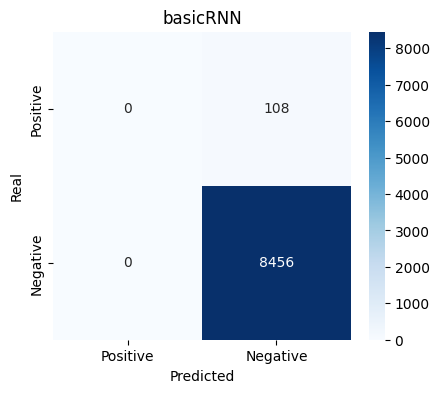

accuracy  : 98.74000000000001
precision : [98.74  0.  ]
recall    : [100.   0.]
f1_score  : [99.37  0.  ]


C:\Users\honsu\anaconda3\envs\glyco\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
predictions_arr = rnn_model.predict(test_rnn_x)

# plot result
y_real = test_y.values
y_pred = predictions_arr.round(0).astype(int)

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## basic RNN with up sampling

In [129]:
# split train/test dataset
random_state=1

target_x = sequence_df
target_y = ml_data[['positive']]
split = StratifiedShuffleSplit(n_splits = 1, test_size = test_size, random_state = random_state)
for train_index, test_index in split.split(target_x, target_y):
    train_rnn_x = target_x.iloc[train_index]
    train_rnn_y = target_y.iloc[train_index]
    
    test_rnn_x = target_x.iloc[test_index]
    test_rnn_y = target_y.iloc[test_index]
    
print(f"train X dataset: {train_rnn_x.shape}")
print(f"test X dataset: {test_rnn_x.shape}")

train X dataset: (34256, 21)
test X dataset: (8564, 21)


In [130]:
random.seed(random_state)

# upsampling for train dataset
train_xy = pd.concat([train_rnn_x, train_rnn_y], axis=1)
train_xy_pos = train_xy[train_xy['positive']==1]
train_xy_neg = train_xy[train_xy['positive']==0]

up_index = [random.choice(range(len(train_xy_pos))) for _ in range(len(train_xy_neg))] # get samples from positive sites
up_sample = train_xy_pos.iloc[up_index]
train_xy_up = pd.concat([up_sample, train_xy_neg], axis=0) # concatenate upsampled positives with negatives
train_xy_up = train_xy_up.sample(frac=1, random_state=random_state) # shuffle the dataframe

train_rnn_x_up = train_xy_up.iloc[:,:-1]
train_rnn_y_up = train_xy_up.iloc[:,[-1]]

print("up-sampled train dataset:", train_rnn_x_up.shape, train_rnn_y_up.shape)

up-sampled train dataset: (67652, 21) (67652, 1)


In [131]:
train_rnn_x_up = AA_onehot_encoding(train_rnn_x_up)
test_rnn_x = AA_onehot_encoding(test_rnn_x)

print(f"train X dataset: {train_rnn_x_up.shape}")
print(f"test X dataset: {test_rnn_x.shape}")

train X dataset: (67652, 21, 20)
test X dataset: (8564, 21, 20)


In [132]:
model_type = 'RNN_sample'

history_size = train_rnn_x_up.shape[1]
history_dim = train_rnn_x_up.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 2
dense_neurons = 100


patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')


rnn_sample_model = ClassifierLSTM(history_size, history_dim, y_dim,
                           rnn_layers = rnn_layers, 
                           rnn_neurons = rnn_neurons,
                           dense_layers = dense_layers, 
                           dense_neurons = dense_neurons
                          ) 

model_name   = f"{model_type} {x_dim} {y_dim} {rnn_layers} {rnn_neurons} {dense_layers} {dense_neurons} {random_state} {version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = rnn_sample_model.fit(train_rnn_x_up, train_rnn_y_up, verbose=2,
                                 epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    rnn_sample_model.save_weights(save_path)
    print(f"model is saved to: {save_path}")

    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")

else:
    rnn_sample_model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")

    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")

model is loaded from: ./model/RNN_sample 107 1 3 100 1 v0.h5
history is loaded from: ./result/RNN_sample 107 1 3 100 1 v0.csv


268/268 [==============================] - 1s 3ms/step


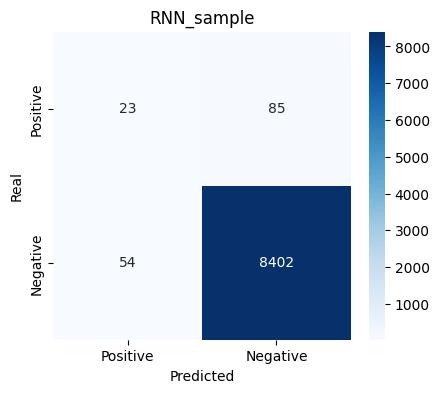

accuracy  : 98.38
precision : [99.   29.87]
recall    : [99.36 21.3 ]
f1_score  : [99.18 24.86]


In [133]:
predictions_arr = rnn_sample_model.predict(test_rnn_x)

# plot result
y_real = test_y.values
y_pred = predictions_arr.round(0).astype(int)

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## RNN with more information

In [179]:
window_size = 10
add_feature = ['flexibility', 'ASA', 'Phi', 'Psi', 'Theta(i-1=>i+1)', 'Tau(i-2=>i+2)', 
               'HSE_alpha_up', 'HSE_alpha_down', 'P(C)', 'P(H)', 'P(E)']

sequence_list = []
for i in range(len(ml_data)):
    data = ml_data.iloc[i]
    name = data['name']
    
    if name == ml_data.iloc[i-1]['name'] and i != 0:
        pass
    else:
        sequence_data = pd.read_csv(f"./protein_sequence/{name}.csv", index_col=0)
    center_index = data['index']
    start_index = max(0, center_index-window_size)
    end_index = min(center_index+window_size+1, len(sequence_data))
    
    sequence_window = sequence_data.iloc[start_index:end_index]
    sequence_AA = sequence_window['SEQ']
    sequence_token = sequence_AA.apply(letter_to_token)
    sequence_onehot = []
    
    for AA_token in sequence_token:
            if AA_token > 0:
                sequence_onehot.append(np.eye(num_AA)[AA_token-1])
            else:
                sequence_onehot.append(np.zeros(num_AA))
    sequence_onehot = np.array(sequence_onehot)
    sequence_add = sequence_window[add_feature].to_numpy()
    sequence_con = np.concatenate([sequence_onehot, sequence_add], axis=1)

    while len(sequence_con) < 21:
        zeros = np.zeros(sequence_con.shape[1])[np.newaxis]
        sequence_con = np.concatenate([sequence_con, zeros], axis=0)
        
    sequence_con = sequence_con[np.newaxis]
    sequence_list.append(sequence_con)
    
ml_rnn_data = np.concatenate(sequence_list)
print("ml_rnn_data shape:", sequence_con.shape)

In [186]:
# split train/test dataset
random_state=1

target_x = ml_rnn_data
target_y = ml_data[['positive']].to_numpy()
split = StratifiedShuffleSplit(n_splits = 1, test_size = test_size, random_state = random_state)
for train_index, test_index in split.split(target_x, target_y):
    train_rnn_x = target_x[train_index]
    train_rnn_y = target_y[train_index]
    
    test_rnn_x = target_x[test_index]
    test_rnn_y = target_y[test_index]
    
print(f"train X dataset: {train_rnn_x.shape}")
print(f"test X dataset: {test_rnn_x.shape}")

train X dataset: (34256, 21, 31)
test X dataset: (8564, 21, 31)


In [245]:
# upsampling for train dataset
index_pos = np.where(train_rnn_y == 1)[0]
index_neg = np.where(train_rnn_y == 0)[0]

up_index = [random.choice(index_pos) for _ in range(len(index_neg))] # get samples from positive sites
sample_pos_x = train_rnn_x[up_index]
sample_pos_y = train_rnn_y[up_index]
sample_neg_x = train_rnn_x[index_neg]
sample_neg_y = train_rnn_y[index_neg]

sample_rnn_x = np.concatenate([sample_pos_x, sample_neg_x], axis=0)
sample_rnn_y = np.concatenate([sample_pos_y, sample_neg_y], axis=0)

sample_index = np.arange(len(sample_rnn_x))
np.random.seed(random_state)
np.random.shuffle(sample_index)
sample_rnn_x = sample_rnn_x[sample_index]
sample_rnn_y = sample_rnn_y[sample_index]

print("up-sampled train dataset:", sample_rnn_x.shape, sample_rnn_y.shape)

up-sampled train dataset: (67652, 21, 31) (67652, 1)


Epoch 1/1000
1692/1692 - 19s - loss: 0.6110 - accuracy: 0.6518 - val_loss: 0.5707 - val_accuracy: 0.6753 - 19s/epoch - 11ms/step
Epoch 2/1000
1692/1692 - 18s - loss: 0.5147 - accuracy: 0.7369 - val_loss: 0.4851 - val_accuracy: 0.7577 - 18s/epoch - 10ms/step
Epoch 3/1000
1692/1692 - 19s - loss: 0.4396 - accuracy: 0.7892 - val_loss: 0.3886 - val_accuracy: 0.8352 - 19s/epoch - 11ms/step
Epoch 4/1000
1692/1692 - 19s - loss: 0.3629 - accuracy: 0.8378 - val_loss: 0.3272 - val_accuracy: 0.8656 - 19s/epoch - 11ms/step
Epoch 5/1000
1692/1692 - 19s - loss: 0.3094 - accuracy: 0.8699 - val_loss: 0.2976 - val_accuracy: 0.8850 - 19s/epoch - 11ms/step
Epoch 6/1000
1692/1692 - 19s - loss: 0.2743 - accuracy: 0.8868 - val_loss: 0.3513 - val_accuracy: 0.8440 - 19s/epoch - 11ms/step
Epoch 7/1000
1692/1692 - 19s - loss: 0.2459 - accuracy: 0.9025 - val_loss: 0.2538 - val_accuracy: 0.9053 - 19s/epoch - 11ms/step
Epoch 8/1000
1692/1692 - 19s - loss: 0.2251 - accuracy: 0.9128 - val_loss: 0.2181 - val_accuracy:

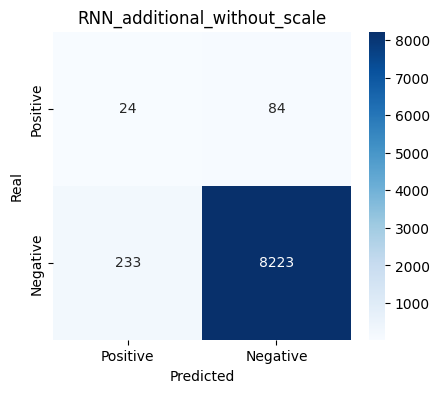

accuracy  : 96.3
precision : [98.99  9.34]
recall    : [97.24 22.22]
f1_score  : [98.11 13.15]


In [248]:
model_type = 'RNN_additional_without_scale'

history_dim = sample_rnn_x.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 2
dense_neurons = 100


patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')


rnn_add_model = ClassifierLSTM(history_size, history_dim, y_dim,
                           rnn_layers = rnn_layers, 
                           rnn_neurons = rnn_neurons,
                           dense_layers = dense_layers, 
                           dense_neurons = dense_neurons
                          ) 

model_name   = f"{model_type} {x_dim} {y_dim} {rnn_layers} {rnn_neurons} {dense_layers} {dense_neurons} {random_state} {version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = rnn_add_model.fit(sample_rnn_x, sample_rnn_y, verbose=2,
                                 epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    rnn_add_model.save_weights(save_path)
    print(f"model is saved to: {save_path}")

    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")

else:
    rnn_add_model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")

    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
predictions_arr = rnn_add_model.predict(test_rnn_x)

# plot result
y_real = test_y.values
y_pred = predictions_arr.round(0).astype(int)

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## with variable scaling

In [260]:
sample_rnn_x_sc = sample_rnn_x.copy()

x_2b_scaled = sample_rnn_x[:,:,-len(add_feature):]
x_min = x_2b_scaled.min(0).min(0)
x_max = x_2b_scaled.max(0).max(0)

x_sc = (x_2b_scaled - x_min) / (x_max - x_min)
sample_rnn_x_sc[:,:,-len(add_feature):] = x_sc

Epoch 1/1000
1692/1692 - 25s - loss: 0.4521 - accuracy: 0.7750 - val_loss: 0.2056 - val_accuracy: 0.9292 - 25s/epoch - 15ms/step
Epoch 2/1000
1692/1692 - 22s - loss: 0.1179 - accuracy: 0.9611 - val_loss: 0.0742 - val_accuracy: 0.9796 - 22s/epoch - 13ms/step
Epoch 3/1000
1692/1692 - 23s - loss: 0.0497 - accuracy: 0.9855 - val_loss: 0.0409 - val_accuracy: 0.9903 - 23s/epoch - 13ms/step
Epoch 4/1000
1692/1692 - 25s - loss: 0.0321 - accuracy: 0.9911 - val_loss: 0.0369 - val_accuracy: 0.9895 - 25s/epoch - 15ms/step
Epoch 5/1000
1692/1692 - 25s - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.0506 - val_accuracy: 0.9849 - 25s/epoch - 15ms/step
Epoch 6/1000
1692/1692 - 25s - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.0640 - val_accuracy: 0.9853 - 25s/epoch - 15ms/step
Epoch 7/1000
1692/1692 - 25s - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.0244 - val_accuracy: 0.9922 - 25s/epoch - 15ms/step
Epoch 8/1000
1692/1692 - 24s - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0271 - val_accuracy:

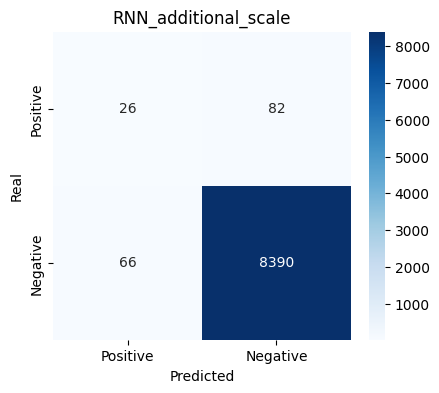

accuracy  : 98.27
precision : [99.03 28.26]
recall    : [99.22 24.07]
f1_score  : [99.13 26.  ]


In [265]:
model_type = 'RNN_additional_scale'

history_dim = sample_rnn_x_sc.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 2
dense_neurons = 100

patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')


rnn_add_model_sc = ClassifierLSTM(history_size, history_dim, y_dim,
                           rnn_layers = rnn_layers, 
                           rnn_neurons = rnn_neurons,
                           dense_layers = dense_layers, 
                           dense_neurons = dense_neurons
                          ) 

model_name   = f"{model_type} {x_dim} {y_dim} {rnn_layers} {rnn_neurons} {dense_layers} {dense_neurons} {random_state} {version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = rnn_add_model_sc.fit(sample_rnn_x_sc, sample_rnn_y, verbose=2,
                                 epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    rnn_add_model_sc.save_weights(save_path)
    print(f"model is saved to: {save_path}")

    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")

else:
    rnn_add_model_sc.load_weights(save_path)
    print(f"model is loaded from: {save_path}")

    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")

test_rnn_x_sc = test_rnn_x.copy()
x_2b_scaled = test_rnn_x[:,:,-len(add_feature):]

x_sc = (x_2b_scaled - x_min) / (x_max - x_min)
test_rnn_x_sc[:,:,-len(add_feature):] = x_sc

predictions_arr = rnn_add_model_sc.predict(test_rnn_x_sc)

# plot result
y_real = test_y.values
y_pred = predictions_arr.round(0).astype(int)

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## only additional feature

Epoch 1/1000
1692/1692 - 30s - loss: 0.6553 - accuracy: 0.6088 - val_loss: 0.6165 - val_accuracy: 0.6517 - 30s/epoch - 17ms/step
Epoch 2/1000
1692/1692 - 32s - loss: 0.5419 - accuracy: 0.7146 - val_loss: 0.4539 - val_accuracy: 0.7784 - 32s/epoch - 19ms/step
Epoch 3/1000
1692/1692 - 31s - loss: 0.3870 - accuracy: 0.8249 - val_loss: 0.3030 - val_accuracy: 0.8763 - 31s/epoch - 19ms/step
Epoch 4/1000
1692/1692 - 30s - loss: 0.2452 - accuracy: 0.9046 - val_loss: 0.1916 - val_accuracy: 0.9342 - 30s/epoch - 18ms/step
Epoch 5/1000
1692/1692 - 31s - loss: 0.1647 - accuracy: 0.9393 - val_loss: 0.1301 - val_accuracy: 0.9568 - 31s/epoch - 18ms/step
Epoch 6/1000
1692/1692 - 32s - loss: 0.1233 - accuracy: 0.9584 - val_loss: 0.1527 - val_accuracy: 0.9351 - 32s/epoch - 19ms/step
Epoch 7/1000
1692/1692 - 30s - loss: 0.0935 - accuracy: 0.9678 - val_loss: 0.1033 - val_accuracy: 0.9646 - 30s/epoch - 18ms/step
Epoch 8/1000
1692/1692 - 30s - loss: 0.0763 - accuracy: 0.9740 - val_loss: 0.0656 - val_accuracy:

1692/1692 - 31s - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0326 - val_accuracy: 0.9897 - 31s/epoch - 18ms/step
Epoch 65/1000
1692/1692 - 33s - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9949 - 33s/epoch - 19ms/step
Epoch 66/1000
1692/1692 - 34s - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0275 - val_accuracy: 0.9942 - 34s/epoch - 20ms/step
Epoch 67/1000
1692/1692 - 32s - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0259 - val_accuracy: 0.9921 - 32s/epoch - 19ms/step
Epoch 68/1000
1692/1692 - 33s - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0165 - val_accuracy: 0.9959 - 33s/epoch - 19ms/step
Epoch 69/1000
1692/1692 - 34s - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0225 - val_accuracy: 0.9954 - 34s/epoch - 20ms/step
Epoch 70/1000
1692/1692 - 32s - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.0464 - val_accuracy: 0.9909 - 32s/epoch - 19ms/step
Epoch 71/1000
1692/1692 - 33s - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0350 - val_accuracy: 0.990

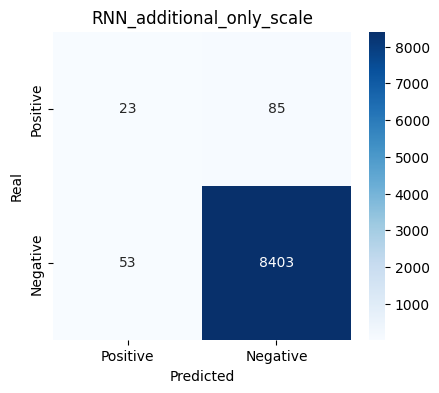

accuracy  : 98.39
precision : [99.   30.26]
recall    : [99.37 21.3 ]
f1_score  : [99.19 25.  ]


In [266]:
model_type = 'RNN_additional_only_scale'

sample_rnn_x_only = sample_rnn_x_sc[:,:,-len(add_feature):]

history_dim = sample_rnn_x_only.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 2
dense_neurons = 100

patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')


rnn_add_model_only = ClassifierLSTM(history_size, history_dim, y_dim,
                           rnn_layers = rnn_layers, 
                           rnn_neurons = rnn_neurons,
                           dense_layers = dense_layers, 
                           dense_neurons = dense_neurons
                          ) 

model_name   = f"{model_type} {x_dim} {y_dim} {rnn_layers} {rnn_neurons} {dense_layers} {dense_neurons} {random_state} {version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = rnn_add_model_only.fit(sample_rnn_x_only, sample_rnn_y, verbose=2,
                                 epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    rnn_add_model_only.save_weights(save_path)
    print(f"model is saved to: {save_path}")

    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")

else:
    rnn_add_model_only.load_weights(save_path)
    print(f"model is loaded from: {save_path}")

    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")

test_rnn_x_sc = test_rnn_x.copy()
x_2b_scaled = test_rnn_x[:,:,-len(add_feature):]

x_sc = (x_2b_scaled - x_min) / (x_max - x_min)
test_rnn_x_sc[:,:,-len(add_feature):] = x_sc

predictions_arr = rnn_add_model_only.predict(test_rnn_x_sc[:,:,-len(add_feature):])

# plot result
y_real = test_y.values
y_pred = predictions_arr.round(0).astype(int)

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])